In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from datetime import datetime
import warnings
from typing import Dict, List, Tuple
from explore import wrangle_all, meta_function_feature_engineering, meta_function_eda_plotting
from explore import meta_function_calculate_statistics, prepare_ts_data, plot_line, to_datetime_hs

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [3]:
# LOAD SCRAPED DATASETS
# ============================ #
SCRAPES_PATH = 'data/scrapes/'
rarran = pd.read_json(SCRAPES_PATH + 'rarran.json')
regis = pd.read_json(SCRAPES_PATH + 'regis.json')

CHANNEL_DICT = {
    'rarran': rarran,
    'regis': regis
}

In [4]:
# Testing functions
# ============================#
data_list = wrangle_all(CHANNEL_DICT)

rarran, regis = data_list[0], data_list[1]
channel_list = rarran, regis

for channel in channel_list:
    meta_function_feature_engineering(channel)


 EDA of rarran's channel:

(2041, 15)



,title,views,likes,dislikes,channel,duration,upload_date,reactions,views_likes_ratio,views_dislikes_ratio,views_reactions_ratio,reactions_likes_ratio,reactions_dislikes_ratio,likes_per_minute,viewtime
0,Make Your Opponent SHATTER! | Freeze Control M...,4543,129,1,rarran,31,2021-06-05,130,0.028395,0.000220,0.028615,129.000000,0.007692,0.238462,140833
1,The Best Hearthstone Expansion (Why the Mini S...,3004,129,1,rarran,11,2021-06-05,130,0.042943,0.000333,0.043276,129.000000,0.007692,0.084615,33044
2,Best Decks for Wailing Caverns (Mini Set) So F...,11335,318,5,rarran,8,2021-06-04,323,0.028055,0.000441,0.028496,63.600000,0.015480,0.024768,90680
3,My Favorite Deck is Finally Good! | Delete War...,12694,274,19,rarran,39,2021-06-04,293,0.021585,0.001497,0.023082,14.421053,0.064846,0.133106,495066
4,NO ONE Expected This Deck WOULD BE INSANE | Ev...,13510,267,11,rarran,39,2021-06-03,278,0.019763,0.000814,0.020577,24.272727,0.039568,0.140288,526890



Index(['title', 'views', 'likes', 'dislikes', 'channel', 'duration',
       'upload_date', 'reactions', 'views_likes_ratio', 'views_dislikes_ratio',
       'views_reactions_ratio', 'reactions_likes_ratio',
       'reactions_dislikes_ratio', 'likes_per_minute', 'viewtime'],
      dtype='object')



,views,likes,dislikes,duration,reactions,views_likes_ratio,views_dislikes_ratio,views_reactions_ratio,reactions_likes_ratio,reactions_dislikes_ratio,likes_per_minute,viewtime
count,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2033.0,2033.000000,2041.000000,2.041000e+03
mean,3387.135228,75.439980,3.905928,21.010779,79.345909,0.024857,0.001438,0.026295,inf,0.060120,inf,7.598575e+04
std,3216.832135,74.705339,6.462939,12.354283,78.043144,0.017715,0.002504,0.018242,NaN,0.086434,NaN,9.179891e+04
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
25%,1180.000000,23.000000,1.000000,12.000000,24.000000,0.016243,0.000387,0.017324,13.0,0.016949,0.181818,1.738800e+04
50%,2647.000000,58.000000,2.000000,21.000000,61.000000,0.020470,0.000864,0.021515,24.0,0.040000,0.372881,5.126000e+04
75%,4579.000000,104.000000,5.000000,28.000000,109.000000,0.026940,0.001615,0.028334,58.0,0.071429,0.761905,1.041600e+05
max,45506.000000,896.000000,93.000000,236.000000,913.000000,0.189189,0.042254,0.189189,inf,1.000000,inf,1.274168e+06


title                       0
views                       0
likes                       0
dislikes                    0
channel                     0
duration                    0
upload_date                 0
reactions                   0
views_likes_ratio           0
views_dislikes_ratio        0
views_reactions_ratio       0
reactions_likes_ratio       8
reactions_dislikes_ratio    8
likes_per_minute            0
viewtime                    0
dtype: int64

title                               object
views                                int64
likes                                int64
dislikes                             int32
channel                             object
duration                             int32
upload_date                 datetime64[ns]
reactions                            int64
views_likes_ratio                  float64
views_dislikes_ratio               float64
views_reactions_ratio              float64
reactions_likes_ratio              float64
reactions_dislikes_ratio           float64
likes_per_minute                   float64
viewtime                             int64
dtype: object


<class 'numpy.float64'>


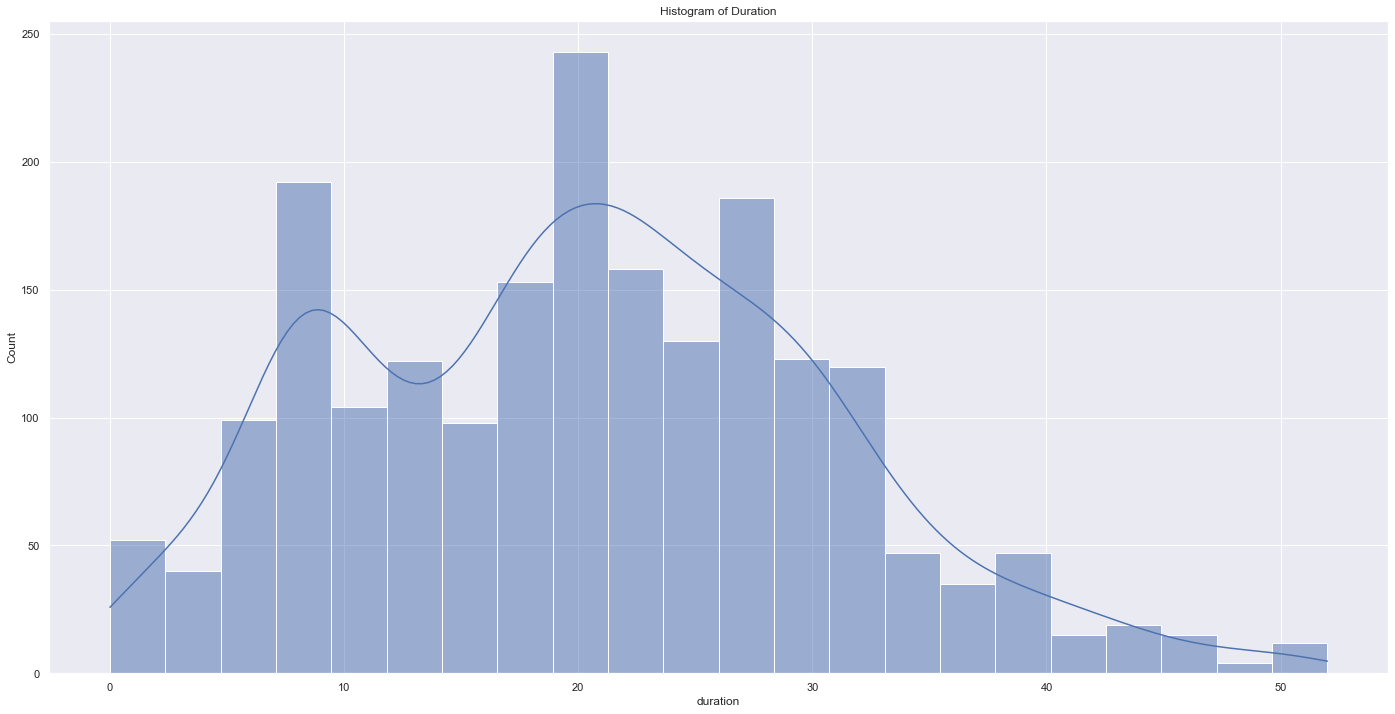

<class 'numpy.float64'>


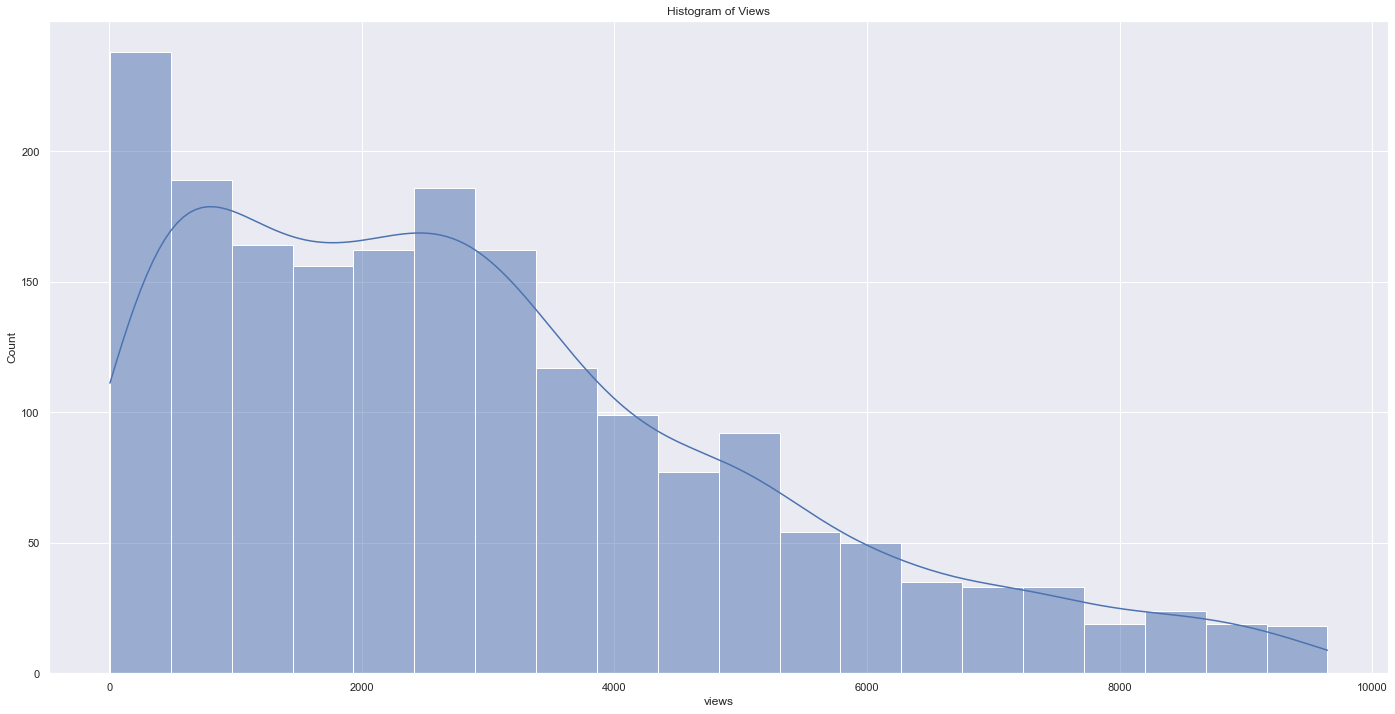

<class 'numpy.float64'>


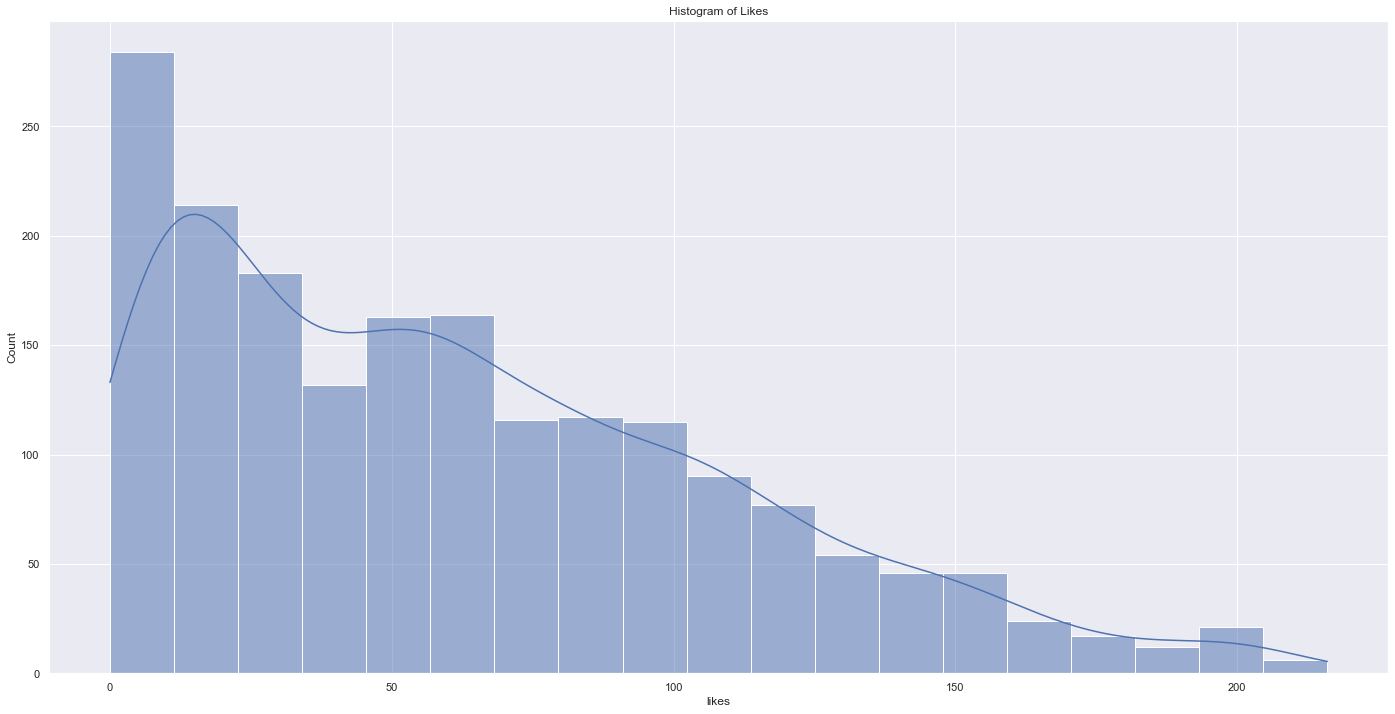

<class 'numpy.float64'>


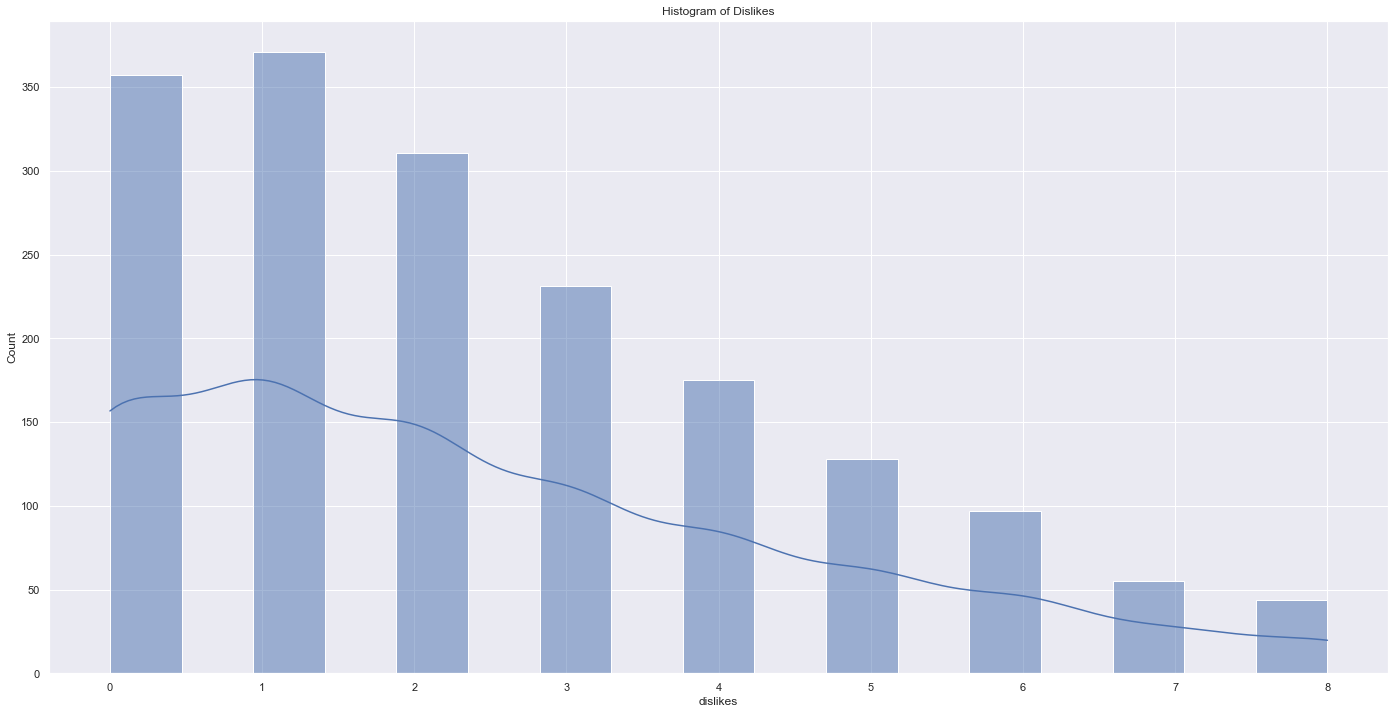


 EDA of regis's channel:

(2234, 15)



,title,views,likes,dislikes,channel,duration,upload_date,reactions,views_likes_ratio,views_dislikes_ratio,views_reactions_ratio,reactions_likes_ratio,reactions_dislikes_ratio,likes_per_minute,viewtime
0,Turn 3 Alexstrasza!? Stealer of Souls steals g...,40826,1006,15,regis,21,2021-06-05,1021,0.024641,0.000367,0.025009,67.066667,0.014691,0.020568,857346
1,Shaman is back! Kicking *** with Sidekick & In...,40285,997,16,regis,15,2021-06-04,1013,0.024749,0.000397,0.025146,62.312500,0.015795,0.014808,604275
2,Lady Anacondra is a cheater.,50977,1362,28,regis,25,2021-06-04,1390,0.026718,0.000549,0.027267,48.642857,0.020144,0.017986,1274425
3,Kresh is the best... and so is this deck.,82252,1914,31,regis,39,2021-06-03,1945,0.023270,0.000377,0.023647,61.741935,0.015938,0.020051,3207828
4,ALL CARDS REVEALED!! Will they be enough? | Wa...,90006,1984,38,regis,39,2021-06-02,2022,0.022043,0.000422,0.022465,52.210526,0.018793,0.019288,3510234



Index(['title', 'views', 'likes', 'dislikes', 'channel', 'duration',
       'upload_date', 'reactions', 'views_likes_ratio', 'views_dislikes_ratio',
       'views_reactions_ratio', 'reactions_likes_ratio',
       'reactions_dislikes_ratio', 'likes_per_minute', 'viewtime'],
      dtype='object')



,views,likes,dislikes,duration,reactions,views_likes_ratio,views_dislikes_ratio,views_reactions_ratio,reactions_likes_ratio,reactions_dislikes_ratio,likes_per_minute,viewtime
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2.234000e+03
mean,38199.705013,687.399284,32.136974,31.491495,719.536258,0.023033,0.001956,0.024990,inf,0.076783,0.866956,1.030386e+06
std,39586.897768,725.666433,44.273557,30.115484,751.214549,0.045331,0.007506,0.050855,NaN,0.107596,5.375570,1.375293e+06
min,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000610,0.000000,0.000000,0.000000,0.000000e+00
25%,6096.750000,109.000000,6.000000,13.000000,118.250000,0.013543,0.000552,0.014831,12.000000,0.029416,0.015842,1.258130e+05
50%,26792.000000,396.500000,21.000000,23.000000,424.000000,0.018530,0.000791,0.019696,21.596875,0.044254,0.037928,6.434805e+05
75%,59539.500000,1131.000000,43.000000,37.000000,1177.750000,0.023936,0.001324,0.025122,32.994898,0.076923,0.310104,1.453532e+06
max,507439.000000,4516.000000,992.000000,445.000000,4887.000000,1.498753,0.196615,1.640898,inf,1.000000,125.000000,2.672632e+07


title                       0
views                       0
likes                       0
dislikes                    0
channel                     0
duration                    0
upload_date                 0
reactions                   0
views_likes_ratio           0
views_dislikes_ratio        0
views_reactions_ratio       0
reactions_likes_ratio       0
reactions_dislikes_ratio    0
likes_per_minute            0
viewtime                    0
dtype: int64

title                               object
views                                int64
likes                                int64
dislikes                             int32
channel                             object
duration                             int32
upload_date                 datetime64[ns]
reactions                            int64
views_likes_ratio                  float64
views_dislikes_ratio               float64
views_reactions_ratio              float64
reactions_likes_ratio              float64
reactions_dislikes_ratio           float64
likes_per_minute                   float64
viewtime                             int64
dtype: object


<class 'numpy.float64'>


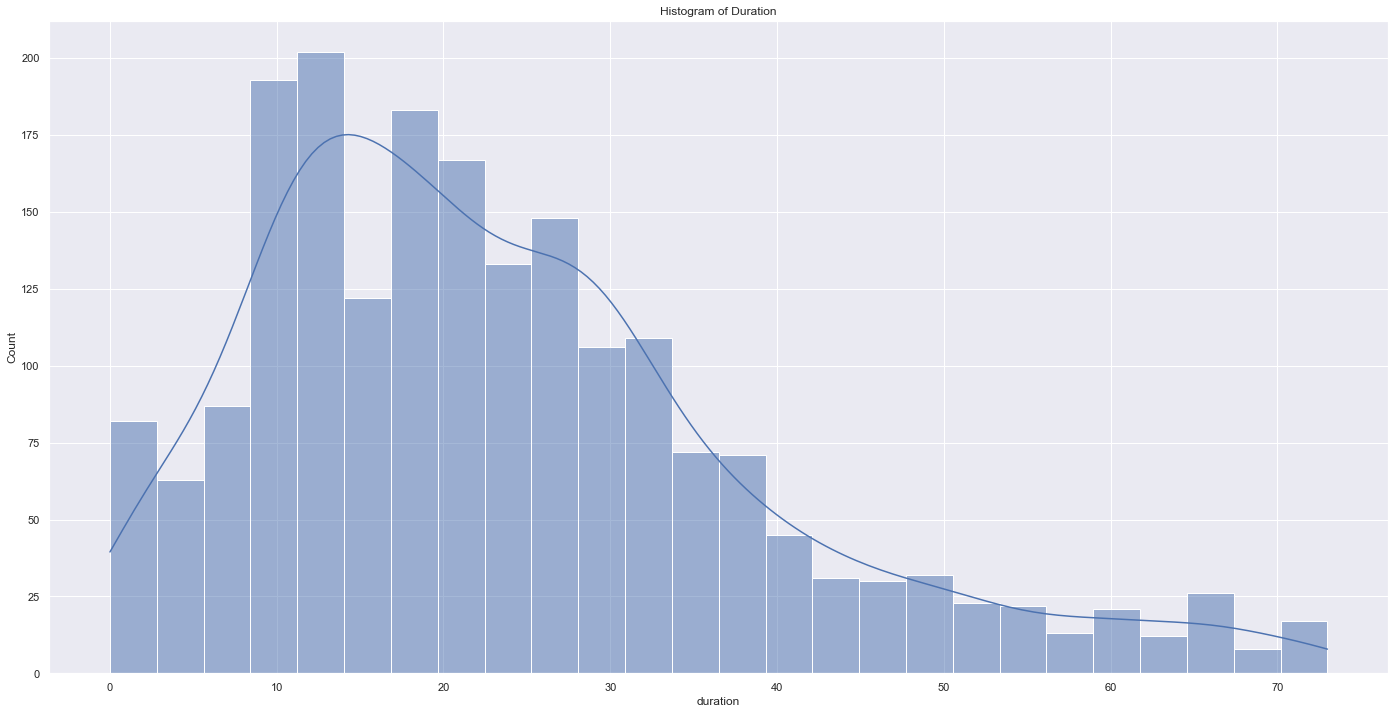

<class 'numpy.float64'>


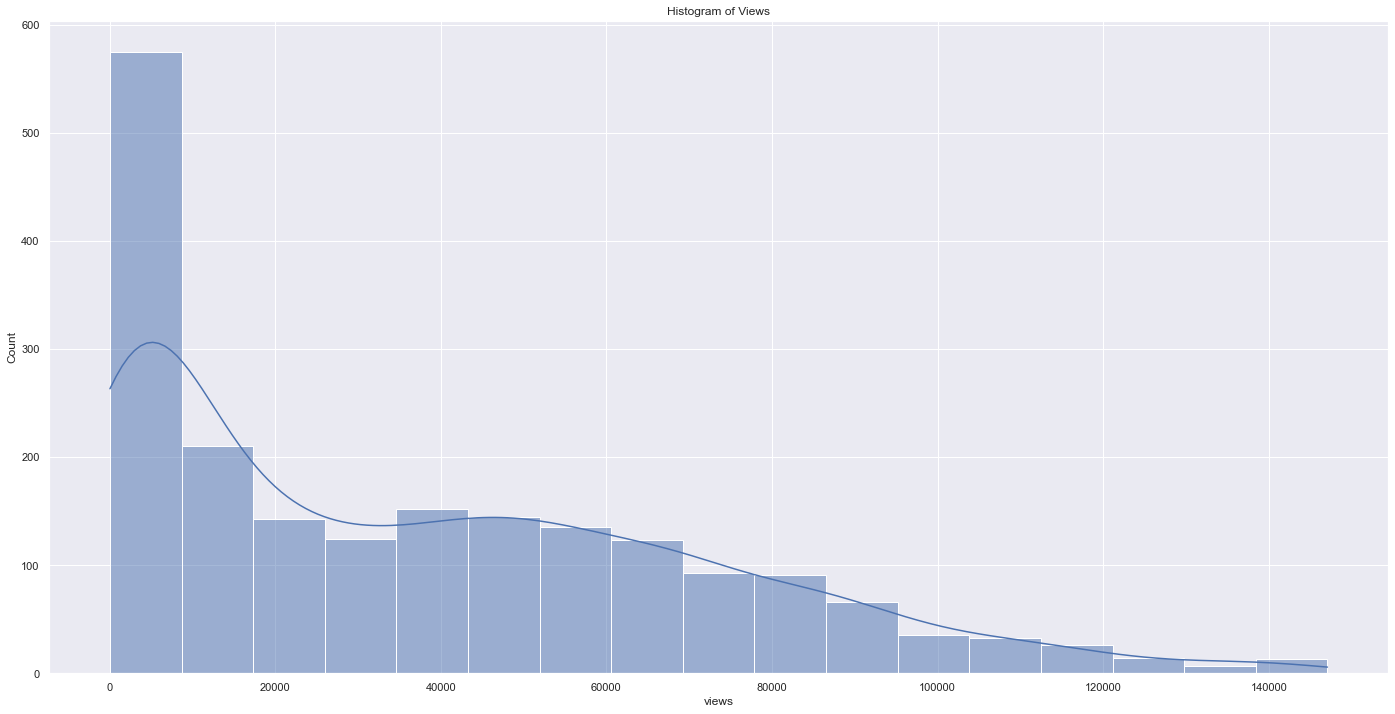

<class 'numpy.float64'>


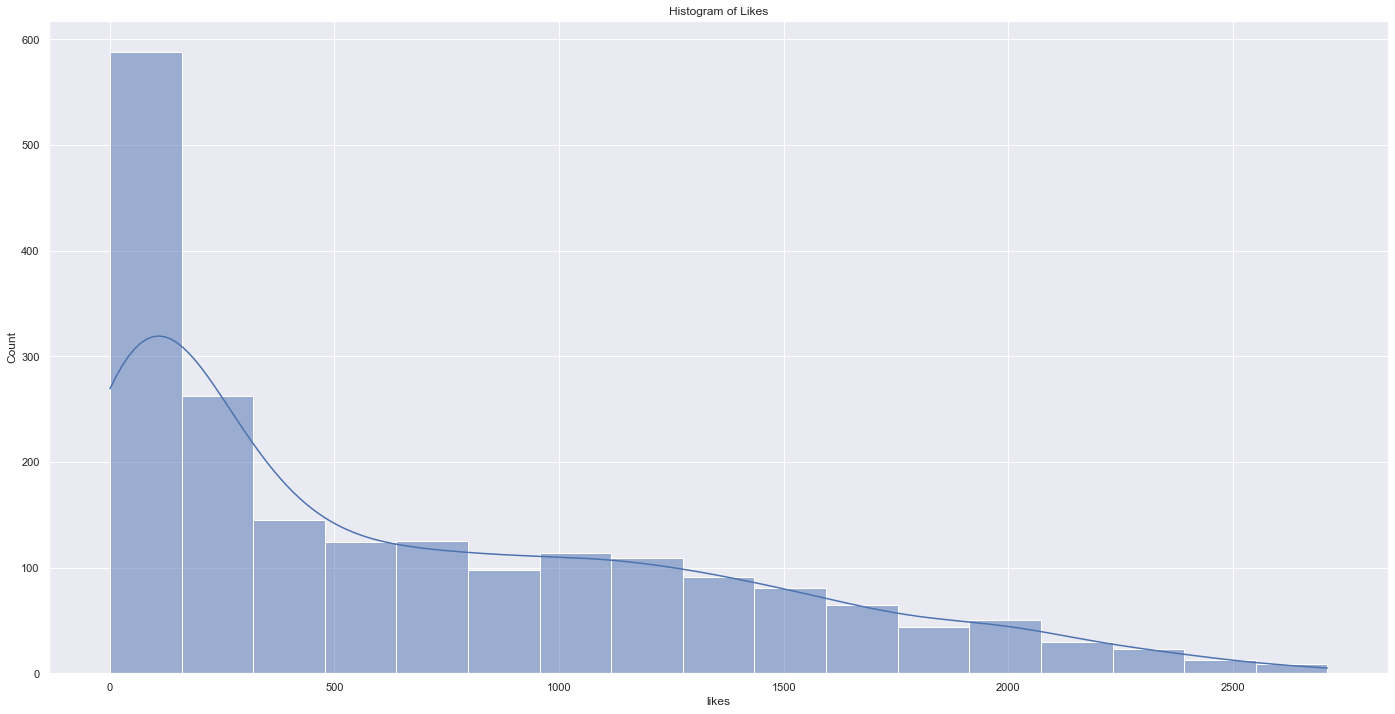

<class 'numpy.float64'>


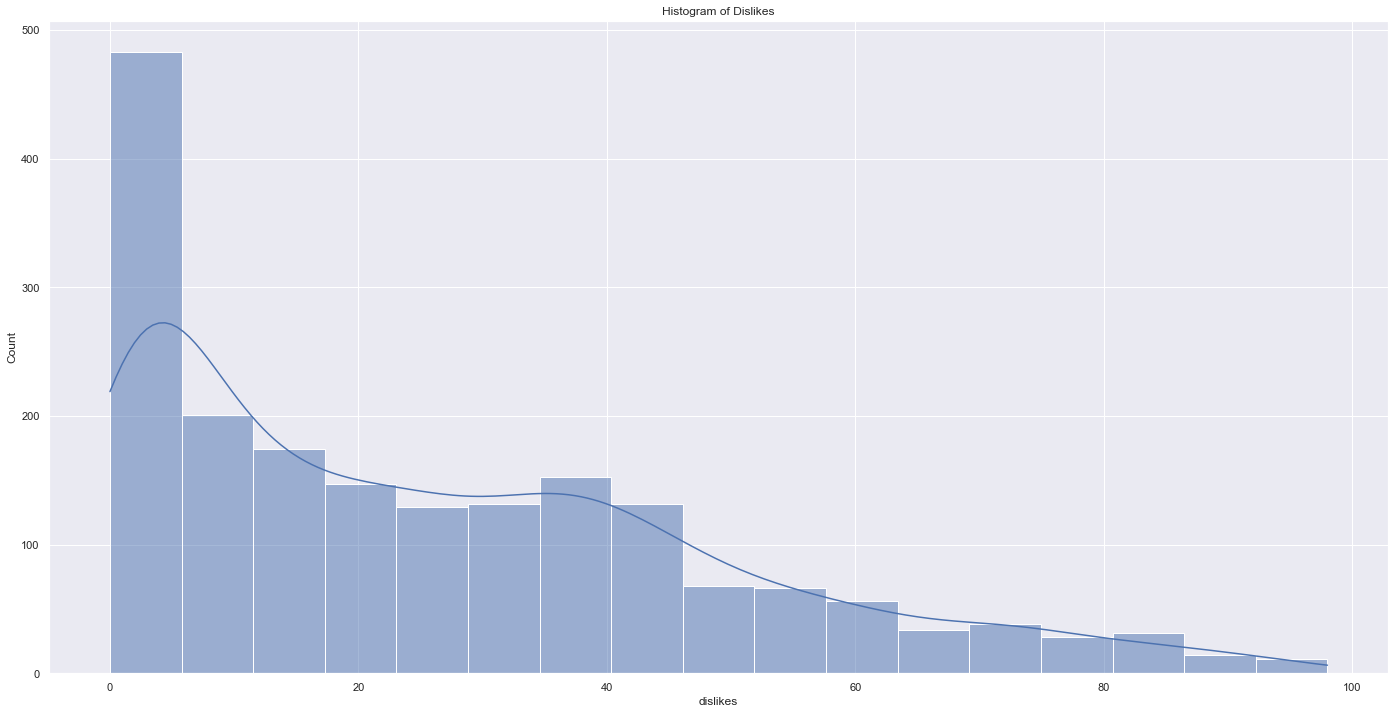

<Figure size 1728x864 with 0 Axes>

In [5]:
for channel in channel_list:
    meta_function_eda_plotting(channel)

In [6]:
rarran_stats = meta_function_calculate_statistics(rarran)
regis_stats = meta_function_calculate_statistics(regis)

print(rarran_stats)
print()
print(regis_stats)

{'channel_age': 811, 'total_videos': 2041, 'total_views': 6913143, 'total_duration': 42883, 'total_viewtime_days': 107699, 'total_viewtime_years': 295, 'total_reactions': 161945, 'total_likes': 153973, 'total_dislikes': 7972, 'total_like_dislike_ratio': 19, 'average_videos_per_day': 2, 'average_videos_per_week': 17, 'average_duration': 21, 'average_views_per_video': 3387, 'average_like_per_video': 75, 'average_dislike_per_video': 3, 'average_reactions_per_video': 79}

{'channel_age': 2104, 'total_videos': 2234, 'total_views': 85338141, 'total_duration': 70352, 'total_viewtime_days': 1598529, 'total_viewtime_years': 4379, 'total_reactions': 1607444, 'total_likes': 1535650, 'total_dislikes': 71794, 'total_like_dislike_ratio': 21, 'average_videos_per_day': 1, 'average_videos_per_week': 7, 'average_duration': 31, 'average_views_per_video': 38199, 'average_like_per_video': 687, 'average_dislike_per_video': 32, 'average_reactions_per_video': 719}
